<a href="https://colab.research.google.com/github/lokeshpara/Deeplearning/blob/S12/part(b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/EVA/S12/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/EVA/S12


In [0]:
import pandas as pd
import json
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [14]:
file = open('dog.json')
data = json.load(file)
print(data.keys())

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories'])


In [15]:
annotations_df = pd.DataFrame.from_dict(data['annotations'])
images_df = pd.DataFrame.from_dict(data['images'])

images_df.head()

,id,width,height,file_name,license,date_captured
0,0,300,430,1.jpg,1,
1,1,400,500,2.jpg,1,
2,2,333,500,3.jpg,1,
3,3,500,334,4.jpg,1,
4,4,500,375,5.jpg,1,


In [16]:
annotations_df.head()

,id,image_id,segmentation,area,bbox,iscrowd
0,0,0,"[75, 47, 257, 47, 257, 405, 75, 405]",65156,"[75, 47, 182, 358]",0
1,1,1,"[112, 31, 370, 31, 370, 486, 112, 486]",117390,"[112, 31, 258, 455]",0
2,2,2,"[3, 62, 263, 62, 263, 447, 3, 447]",100100,"[3, 62, 260, 385]",0
3,3,3,"[204, 10, 458, 10, 458, 302, 204, 302]",74168,"[204, 10, 254, 292]",0
4,4,4,"[7, 86, 458, 86, 458, 341, 7, 341]",115005,"[7, 86, 451, 255]",0


In [17]:
imp_df = pd.concat([images_df, annotations_df], 1)[['file_name', 'width', 'height', 'bbox']]
x_ = []
y_ = []
w_ = []
h_ = [] 
for row in range(imp_df.shape[0]):
  x_.append(imp_df['bbox'][row][0])
  y_.append(imp_df['bbox'][row][1])
  w_.append(imp_df['bbox'][row][2])
  h_.append(imp_df['bbox'][row][3])
box_df = pd.DataFrame(list(zip(x_, y_, w_, h_)), columns =['x', 'y', 'box_width', 'box_height'])
imp_df = pd.concat([imp_df, box_df], 1)
imp_df = imp_df.drop('bbox', axis =1)
imp_df.head()

,file_name,width,height,x,y,box_width,box_height
0,1.jpg,300,430,75,47,182,358
1,2.jpg,400,500,112,31,258,455
2,3.jpg,333,500,3,62,260,385
3,4.jpg,500,334,204,10,254,292
4,5.jpg,500,375,7,86,451,255


In [18]:
imp_df['x'] = imp_df['x'] / imp_df['width']
imp_df['y'] = imp_df['y'] / imp_df['height']
imp_df['box_width'] = imp_df['box_width'] / imp_df['width']
imp_df['box_height'] = imp_df['box_height'] / imp_df['height']
imp_df.head()

,file_name,width,height,x,y,box_width,box_height
0,1.jpg,300,430,0.250000,0.109302,0.606667,0.832558
1,2.jpg,400,500,0.280000,0.062000,0.645000,0.910000
2,3.jpg,333,500,0.009009,0.124000,0.780781,0.770000
3,4.jpg,500,334,0.408000,0.029940,0.508000,0.874251
4,5.jpg,500,375,0.014000,0.229333,0.902000,0.680000


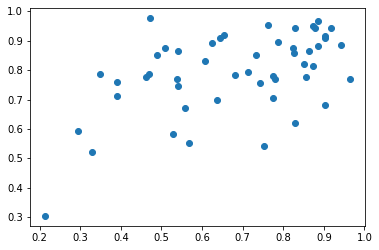

In [19]:
imp_stripped = imp_df[["box_width", "box_height"]].to_numpy()
plt.scatter(imp_stripped[:,0], imp_stripped[:,1])

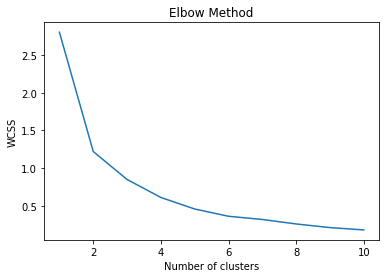

In [39]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(imp_stripped)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
kmeans=KMeans(n_clusters=2,init='k-means++',max_iter = 300,n_init=10,random_state=0)

y_kmeans=kmeans.fit_predict(imp_stripped)

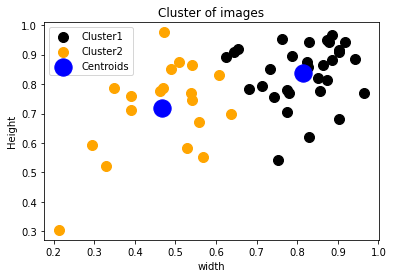

In [43]:
plt.scatter(imp_stripped[y_kmeans==0, 0], imp_stripped[y_kmeans ==0, 1], s=100, c='black', label = 'Cluster1')
plt.scatter(imp_stripped[y_kmeans==1, 0], imp_stripped[y_kmeans ==1, 1], s=100, c='orange', label = 'Cluster2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='blue', label = 'Centroids') 
plt.title('Cluster of images')
plt.xlabel('width')
plt.ylabel ('Height')
plt.legend()
plt.show()